In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from ipywidgets import interact


In [4]:
data = pd.read_csv('Crop_recommendation.csv')

In [5]:
print("shape of the data set:", data.shape)


shape of the data set: (2200, 8)


In [6]:
data.head()


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [7]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [8]:
 data['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [9]:
print("Average Ratio of N2 in the soil:{0:.2f}".format(data['N'].mean()))
print("Average Ratio of P in the soil:{0:.2f}".format(data['P'].mean()))
print("Average Ratio of K in the soil:{0:.2f}".format(data['K'].mean()))
print("Average Temperature in C:{0:.2f}".format(data['temperature'].mean()))
print("Average Relative humidity in %:{0:.2f}".format(data['humidity'].mean()))
print("Average ph of the soil:{0:.2f}".format(data['ph'].mean()))
print("Average Rainfall recieved:{0:.2f}".format(data['rainfall'].mean()))

Average Ratio of N2 in the soil:50.55
Average Ratio of P in the soil:53.36
Average Ratio of K in the soil:48.15
Average Temperature in C:25.62
Average Relative humidity in %:71.48
Average ph of the soil:6.47
Average Rainfall recieved:103.46


In [10]:
@interact

def summary(crops = list (data[ 'label' ].value_counts ().index)):
    x= data[data['label'] == crops]
    print("--------------------------------------")
    print("Statistics for Nitrogen")
    print("Minimum Nitrigen required :", x['N'].min())
    print("Average Nitrogen required :", x['N'].mean())
    print("Maximum Nitrogen required :", x['N'].max())
    print("--------------------------------------")

interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'jute', 'cotton', 'coconut', 'pa…

In [11]:
#List of crops which require above and below average
@interact
def compare (conditions = ['N', 'P', 'K', 'temperature', 'ph', 'humidity', 'rainfall']):
    print("Crops which require greater than average", conditions, '\n') 
    print (data[data[conditions]>data[conditions].mean()]['label']. unique())
    print("-----------------------------------------------")
    print("Crops which require less than average", conditions, '\n')
    print (data[data[conditions] <= data[conditions].mean()]['label'].unique())

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

C:\Users\ravit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ravit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ravit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\loc

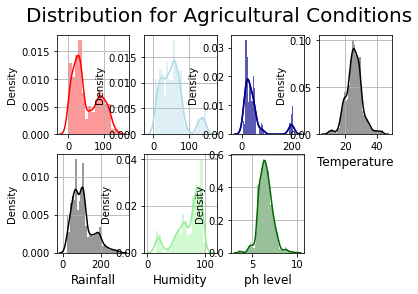

In [12]:
plt.subplot(2, 4, 1) 
sns.distplot (data['N'], color = 'red')
plt.xlabel('Ratio of N2', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 2) 
sns.distplot (data['P'], color = 'lightblue')
plt.xlabel('Ratio of P', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 3) 
sns.distplot (data['K'], color = 'darkblue')
plt.xlabel('Ratio of K', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 3) 
sns.distplot (data['K'], color = 'darkblue')
plt.xlabel('Ratio of K', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 4) 
sns.distplot (data['temperature'], color = 'black')
plt.xlabel('Temperature', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 5) 
sns.distplot (data['rainfall'], color = 'black')
plt.xlabel('Rainfall', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 6) 
sns.distplot (data['humidity'], color = 'lightgreen')
plt.xlabel('Humidity', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 7) 
sns.distplot (data['ph'], color = 'darkgreen')
plt.xlabel('ph level', fontsize = 12)
plt.grid()

plt.suptitle('Distribution for Agricultural Conditions', fontsize = 20)
plt.show()

In [13]:

print("Crops which requires very High Ratio of Nitrogen Content in Soil:", data[data['N'] > 120] ['label'].unique())
print("Crops which requires very High Ratio of Phosphorous Content in Soil:", data[data['P'] > 100] ['label'].unique()) 
print("Crops which requires very High Ratio of Potassium Content in Soil:", data [data['K']> 200]['label'].unique())
print("Crops which requires very High Rainfall:", data[data['rainfall'] > 200] [ 'label'].unique()) 
print("Crops which requires very Low Temperature:", data[data['temperature'] < 10]['label'].unique())
print("Crops which requires very High Temperature:", data [data['temperature'] > 40] [ 'label'].unique())
print("Crops which requires very Low Humidity:", data [data['humidity']<20] ['label'].unique()) 
print("Crops which requires very Low pH:", data [data['ph'] < 4]['label'].unique()) 
print("Crops which requires very High pH: ", data[data['ph'] > 9]['label'].unique())

Crops which requires very High Ratio of Nitrogen Content in Soil: ['cotton']
Crops which requires very High Ratio of Phosphorous Content in Soil: ['grapes' 'apple']
Crops which requires very High Ratio of Potassium Content in Soil: ['grapes' 'apple']
Crops which requires very High Rainfall: ['rice' 'papaya' 'coconut']
Crops which requires very Low Temperature: ['grapes']
Crops which requires very High Temperature: ['grapes' 'papaya']
Crops which requires very Low Humidity: ['chickpea' 'kidneybeans']
Crops which requires very Low pH: ['mothbeans']
Crops which requires very High pH:  ['mothbeans']


In [14]:
print("Summer Crops")
print (data[(data['temperature'] > 30) & (data['humidity'] > 50)]['label'].unique()) 
print("-----------------------")
print("Winter Crops")
print (data[(data['temperature'] < 20) & (data['humidity'] > 30)]['label'].unique()) 
print("----------------------")
print("Rainy Crops")
print(data[(data['rainfall'] > 200) & (data['humidity']> 30)]['label' ].unique())


Summer Crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
-----------------------
Winter Crops
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
----------------------
Rainy Crops
['rice' 'papaya' 'coconut']


In [15]:
from sklearn.cluster import KMeans

x= data.drop(['label'], axis=1)
x= x.values
print(x.shape)

(2200, 7)


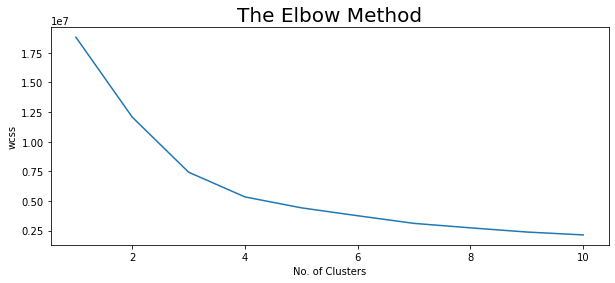

In [16]:
plt.rcParams['figure.figsize'] = (10, 4)
wcss=[]
for i in range(1,11):
    km= KMeans(n_clusters = i, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 8)
    km.fit(x )
    wcss.append(km.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize= 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [17]:
km = KMeans (n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0) 
y_means=km.fit_predict(x)

a = data['label']
y_means = pd.DataFrame (y_means)
z = pd.concat([y_means, a], axis = 1) 
z = z.rename (columns= {0: 'cluster'})

print("Lets check the Results After Applying the K Means Clustering Analysis \n")
print("Crops in First Cluster:", z[z['cluster']==0]['label'].unique())
print("--------------------------------")
print("Crops in Second Cluster:", z[z['cluster'] == 1]['label'].unique())
print("--------------------------------")
print("Crops in Third Cluster:", z[z['cluster'] ==2]['label'].unique())
print("--------------------------------")
print("Crops in Forth Cluster:", z[z['cluster'] ==3]['label'].unique())

Lets check the Results After Applying the K Means Clustering Analysis 

Crops in First Cluster: ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
--------------------------------
Crops in Second Cluster: ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
--------------------------------
Crops in Third Cluster: ['grapes' 'apple']
--------------------------------
Crops in Forth Cluster: ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']


In [18]:
y = data['label']
x = data.drop(['label'], axis = 1)

print("Shape of x:", x.shape)
print("Shape of y:", y.shape)


Shape of x: (2200, 7)
Shape of y: (2200,)


In [19]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size = 0.2, random_state = 0)

print("The Shape of x train:", x_train.shape)
print("The Shape of x test:", x_test.shape) 
print("The Shape of y train:", y_train.shape)
print("The Shape of y test: ", y_test.shape)

The Shape of x train: (1760, 7)
The Shape of x test: (440, 7)
The Shape of y train: (1760,)
The Shape of y test:  (440,)


In [20]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression() 
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

C:\Users\ravit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


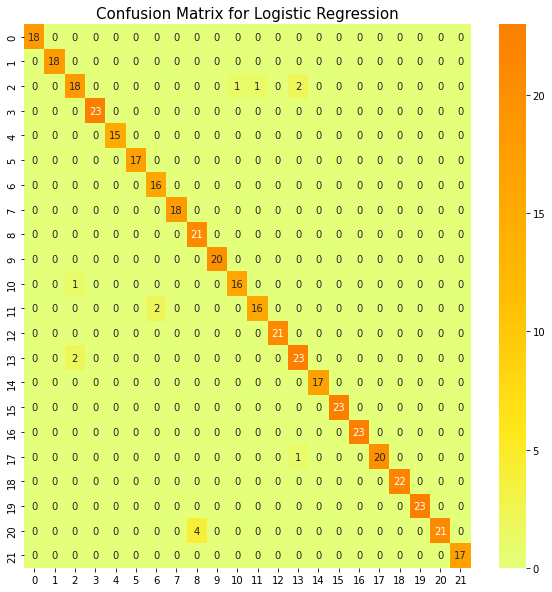

In [21]:

from sklearn.metrics import confusion_matrix

plt.rcParams['figure.figsize'] = (10, 10)
cm = confusion_matrix(y_test, y_pred) 
sns.heatmap(cm, annot = True, cmap = 'Wistia')
plt.title('Confusion Matrix for Logistic Regression', fontsize = 15) 
plt.show()

In [22]:
from sklearn.metrics import classification_report

cr = classification_report(y_test, y_pred) 
print(cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.86      0.82      0.84        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.89      1.00      0.94        16
      grapes       1.00      1.00      1.00        18
        jute       0.84      1.00      0.91        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.94      0.94      0.94        17
       maize       0.94      0.89      0.91        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.88      0.92      0.90        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

In [23]:
data.head()


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [24]:
'''
enter this command to get result: prediction = model.predict((np.array([[Value of Nitrogen,
Value of Phosphorous,value of Potassium, Temperature,Humidity,Ph of soil,rain fall recieved,]])))
'''
prediction = model.predict((np.array([[90,40,40,20,80,7,200]])))
print("The Prediction for crop is ",prediction)

The Prediction for crop is  ['rice']


C:\Users\ravit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
